<a href="https://colab.research.google.com/github/aswinmkv/Python_Portfolio/blob/main/Clustering_Edtech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data=pd.read_csv("scaler_clustering - data.csv")
data

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [ ]:
# To know about the overall structure of data
data.shape
data.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
# keep letters, numbers, and spaces; replace others with a space and collapse repeats
import re

def remove_special(s: str) -> str:

    s = re.sub(r'[^A-Za-z0-9\s]', ' ', s)
    s = re.sub(r'\s+', ' ', s)

    return s


data.job_position=data.job_position.apply(lambda x: remove_special(str(x)))
data.job_position=data.job_position.apply(lambda x: x.lower())
data.job_position=data.job_position.apply(lambda x: x.strip())
data.job_position

,job_position
0,other
1,fullstack engineer
2,backend engineer
3,backend engineer
4,fullstack engineer
...,...
205838,nan
205839,nan
205840,nan
205841,nan


In [ ]:
data

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,nan,2019.0
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,nan,2020.0
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,nan,2021.0
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,nan,2019.0


Manual clustering

In [ ]:
#dropping email will create different records and there will be no confusion for clustering
df=data
df.drop(columns=['email_hash'],inplace=True)
df.shape


(205843, 5)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(188260, 5)

In [ ]:
# Check on the missing values and type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188260 entries, 0 to 205842
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      188216 non-null  object 
 1   orgyear           188174 non-null  float64
 2   ctc               188260 non-null  int64  
 3   job_position      188260 non-null  object 
 4   ctc_updated_year  188260 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.6+ MB


In [ ]:
# basic Statistical measure on numerical features present in dataset
df.describe(include="all")

,company_hash,orgyear,ctc,job_position,ctc_updated_year
count,188216,188174.000000,1.882600e+05,188260,188260.000000
unique,37299,NaN,NaN,881,NaN
top,nvnv wgzohrnvzwj otqcxwto,NaN,NaN,nan,NaN
freq,4284,NaN,NaN,43514,NaN
mean,NaN,2014.614702,2.388491e+06,NaN,2019.576527
std,NaN,66.464548,1.221382e+07,NaN,1.343461
min,NaN,0.000000,2.000000e+00,NaN,2015.000000
25%,NaN,2013.000000,6.000000e+05,NaN,2019.000000
50%,NaN,2016.000000,1.000000e+06,NaN,2020.000000
75%,NaN,2018.000000,1.750000e+06,NaN,2021.000000


In [ ]:
#overall missing values in data
df.isna().sum()

,0
company_hash,44
orgyear,86
ctc,0
job_position,0
ctc_updated_year,0


In [ ]:
# Updating the missing values in job postion feature based on the majority roles in company
df['orgyear'] = df['orgyear'].fillna(df.groupby('company_hash')['orgyear'].transform('mean'))
df.isna().sum()

,0
company_hash,44
orgyear,26
ctc,0
job_position,0
ctc_updated_year,0


In [ ]:
df=df[~df['orgyear'].isnull()]

In [ ]:
#checking for outliers in orgyear
df.orgyear.value_counts().sort_values(ascending=True)

,count
orgyear,
1981.000000,1
2015.557257,1
2015.146341,1
206.000000,1
2012.666667,1
...,...
2019.000000,18574
2015.000000,19617
2017.000000,21314


In [ ]:
#removing outliers from orgyear using IQR

q1=df.orgyear.quantile(0.25)
q3=df.orgyear.quantile(0.75)
iqr=q3-q1

df=df.loc[(df.orgyear>=q1-1.5*iqr) & (df.orgyear<=q3+1.5*iqr)]


#removing outliers from ctc using IQR

q1=df.ctc.quantile(0.25)
q3=df.ctc.quantile(0.75)
iqr=q3-q1

df=df.loc[(df.ctc>=q1-1.5*iqr) & (df.ctc<=q3+1.5*iqr)]

In [ ]:
df.shape

(169082, 5)

In [ ]:
#Masking companies having count less than 5
df=df.apply(lambda x: x.mask(x.map(x.value_counts())<=5,'Others') if x.name=='company_hash' else x)
df.company_hash.value_counts()

,count
company_hash,
Others,46864
nvnv wgzohrnvzwj otqcxwto,4111
xzegojo,2910
vbvkgz,2227
wgszxkvzn,2116
...,...
rxnnrt mrvwp mggp,6
exqon vbtqxwvz wgqugqvnxgz,6
gbzxt ogrhnxgzo,6


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(147168, 5)

In [ ]:
#orgyear check
df['orgyear'] = df.apply(lambda x: x['orgyear'] if x['orgyear'] <=
                     2025 else 2025, axis=1)

In [ ]:
#Creating Years of Experience Columns
df['years_of_experience']=2025-df['orgyear']

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(147168, 6)

In [ ]:
df=df[~df['years_of_experience'].isnull()]
df=df[~df['company_hash'].isnull()]
df.shape

(147126, 6)

In [ ]:
#ctc_updated_year_creation
df['ctc_updated_year'] = df.apply(lambda x: x['orgyear'] if x['ctc_updated_year'] <
                     x['orgyear'] else x['ctc_updated_year'], axis=1)

In [ ]:
#Filling null values with others
df['job_position'] = df['job_position'].fillna('Others')
df['company_null'] = df['company_hash'].fillna('Others')

In [ ]:
df.isnull().sum()

,0
company_hash,0
orgyear,0
ctc,0
job_position,0
ctc_updated_year,0
years_of_experience,0
company_null,0


In [ ]:
df.describe()

,orgyear,ctc,ctc_updated_year,years_of_experience
count,147126.000000,1.471260e+05,147126.000000,147126.000000
mean,2015.483548,1.127857e+06,2019.601910,9.516452
std,3.315767,7.436522e+05,1.343963,3.315767
min,2005.705426,2.000000e+00,2015.000000,0.000000
25%,2013.000000,5.700000e+05,2019.000000,7.000000
50%,2016.000000,9.500000e+05,2020.000000,9.000000
75%,2018.000000,1.550000e+06,2021.000000,12.000000
max,2025.000000,3.330000e+06,2025.000000,19.294574


In [ ]:
#categorized jobs
jp_category=pd.read_excel("Categorized_Job_Positions.xlsx")
jp_category

,job_position,job_category
0,other,Others
1,fullstack engineer,Engineering / Development
2,backend engineer,Engineering / Development
3,NaN,Others
4,ios engineer,Engineering / Development
...,...,...
795,graduate engineer trainee,Engineering / Development
796,analyst software engineer,Engineering / Development
797,member technical staff iii,Others
798,web ui designer,Design / Creative


In [ ]:
df=df.merge(jp_category, left_on='job_position', right_on='job_position', how='left')
df.drop(columns=['company_null'],inplace=True)
df=df[~(df['job_position'].isnull())]
df=df[~(df['job_category'].isnull())]
df.isnull().sum()

,0
company_hash,0
orgyear,0
ctc,0
job_position,0
ctc_updated_year,0
years_of_experience,0
job_category,0


In [ ]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,job_category
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,9.0,Others
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,7.0,Engineering / Development
2,Others,2015.0,2000000,backend engineer,2020.0,10.0,Engineering / Development
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,8.0,Engineering / Development
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,8.0,Engineering / Development
...,...,...,...,...,...,...,...
146764,gqvwrt,2019.0,950000,backend engineer,2021.0,6.0,Engineering / Development
146765,ugrxwjmvkvvqwgb,2021.0,1000000,backend engineer,2021.0,4.0,Engineering / Development
146767,wos xzntqzvnxgzvr,2016.0,1500000,fullstack engineer,2021.0,9.0,Engineering / Development
146768,ahzzyhbmj,2019.0,1100000,data scientist,2021.0,6.0,Data / Analytics


In [ ]:
#Manual Clustering based on company, job position and years of experience
group_cjpyoe=df.groupby(['years_of_experience','job_position','company_hash'])['ctc'].describe()
group_cjpyoe

count  \
years_of_experience job_position       company_hash                    
0.000000            backend engineer   zgn vuurxwvmrt vwwghzn    1.0   
                    devops engineer    Others                    1.0   
                    frontend engineer  Others                    1.0   
                    fullstack engineer Others                    1.0   
                                       zgzt                      1.0   
...                                                              ...   
19.000000           support engineer   xzegq                     1.0   
                                       ywr ntwyzgrgsxto          2.0   
                                       zvz                       1.0   
                    team lead          utqoxontzn ojontbo        1.0   
19.294574           data analyst       mvzp ge vbtqxwv           1.0   

                                                                    mean  \
years_of_experience job_position       company_hash                        
0.000000            backend engineer   zgn vuurxwvmrt vwwghzn    56000.0   
                    devops engineer    Others                   150000.0   
                    frontend engineer  Others                    42000.0   
                    fullstack engineer Others                   120000.0   
                                       zgzt                    1200000.0   
...                                                                  ...   
19.000000           support engineer   xzegq                    900000.0   
                                       ywr ntwyzgrgsxto         850000.0   
                                       zvz                      400000.0   
                    team lead          utqoxontzn ojontbo      1600000.0   
19.294574           data analyst       mvzp ge vbtqxwv         1300000.0   

                                                                         std  \
years_of_experience job_position       company_hash                            
0.000000            backend engineer   zgn vuurxwvmrt vwwghzn            NaN   
                    devops engineer    Others                            NaN   
                    frontend engineer  Others                            NaN   
                    fullstack engineer Others                            NaN   
                                       zgzt                              NaN   
...                                                                      ...   
19.000000           support engineer   xzegq                             NaN   
                                       ywr ntwyzgrgsxto        494974.746831   
                                       zvz                               NaN   
                    team lead          utqoxontzn ojontbo                NaN   
19.294574           data analyst       mvzp ge vbtqxwv                   NaN   

                                                                     min  \
years_of_experience job_position       company_hash                        
0.000000            backend engineer   zgn vuurxwvmrt vwwghzn    56000.0   
                    devops engineer    Others                   150000.0   
                    frontend engineer  Others                    42000.0   
                    fullstack engineer Others                   120000.0   
                                       zgzt                    1200000.0   
...                                                                  ...   
19.000000           support engineer   xzegq                    900000.0   
                                       ywr ntwyzgrgsxto         500000.0   
                                       zvz                      400000.0   
                    team lead          utqoxontzn ojontbo      1600000.0   
19.294574           data analyst       mvzp ge vbtqxwv         1300000.0   

                                                                     25%  \
years_of_experience job_positio

In [ ]:
df_cjpyoe=df.merge(group_cjpyoe, on=['years_of_experience','job_position','company_hash'], how='left')
df_cjpyoe.sort_values(['years_of_experience','job_position','company_hash'])

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,job_category,count,mean,std,min,25%,50%,75%,max
61726,zgn vuurxwvmrt vwwghzn,2025.000000,56000,backend engineer,2025.0,0.000000,Engineering / Development,1.0,56000.0,NaN,56000.0,56000.0,56000.0,56000.0,56000.0
62290,Others,2025.000000,150000,devops engineer,2025.0,0.000000,Engineering / Development,1.0,150000.0,NaN,150000.0,150000.0,150000.0,150000.0,150000.0
99174,Others,2025.000000,42000,frontend engineer,2025.0,0.000000,Engineering / Development,1.0,42000.0,NaN,42000.0,42000.0,42000.0,42000.0,42000.0
45840,Others,2025.000000,120000,fullstack engineer,2025.0,0.000000,Engineering / Development,1.0,120000.0,NaN,120000.0,120000.0,120000.0,120000.0,120000.0
66298,zgzt,2025.000000,1200000,fullstack engineer,2025.0,0.000000,Engineering / Development,1.0,1200000.0,NaN,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8603,ywr ntwyzgrgsxto,2006.000000,500000,support engineer,2021.0,19.000000,Engineering / Development,2.0,850000.0,494974.746831,500000.0,675000.0,850000.0,1025000.0,1200000.0
27319,ywr ntwyzgrgsxto,2006.000000,1200000,support engineer,2021.0,19.000000,Engineering / Development,2.0,850000.0,494974.746831,500000.0,675000.0,850000.0,1025000.0,1200000.0
10654,zvz,2006.000000,400000,support engineer,2021.0,19.000000,Engineering / Development,1.0,400000.0,NaN,400000.0,400000.0,400000.0,400000.0,400000.0
44436,utqoxontzn ojontbo,2006.000000,1600000,team lead,2021.0,19.000000,Leadership / Executive,1.0,1600000.0,NaN,1600000.0,1600000.0,1600000.0,1600000.0,1600000.0


In [ ]:
df_cjpyoe.drop_duplicates(inplace=True)
df_cjpyoe.shape
#no change till now

(112861, 15)

In [ ]:
#Creating Designation basis on the salary they are getting in their respective company
def condition_designation(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2

    elif a>=b_75:
        return 1


In [ ]:
df_cjpyoe['designation'] =df_cjpyoe.apply(lambda x: condition_designation(x['ctc'],x['50%'],x['75%']),axis=1)
df_cjpyoe.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,job_category,count,mean,std,min,25%,50%,75%,max,designation
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,9.0,Others,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,7.0,Engineering / Development,7.0,7.742856e+05,250922.324350,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,10.0,Engineering / Development,456.0,9.609559e+05,776546.830662,1000.0,307500.0,800000.0,1435000.0,3200000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,8.0,Engineering / Development,7.0,1.158571e+06,404780.951933,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,8.0,Engineering / Development,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2


In [ ]:
df_cjpyoe.designation.value_counts(normalize=True)*100

,proportion
designation,
2,45.638440
3,33.146082
1,21.215477


In [ ]:
#Manual Clustering based on company and job position
group_cj=df.groupby(['job_position','company_hash'])['ctc'].describe()
group_cj

,,count,mean,std,min,25%,50%,75%,max
job_position,company_hash,,,,,,,,
a group chat application,Others,1.0,500000.0,NaN,500000.0,500000.0,500000.0,500000.0,500000.0
abap developer,Others,1.0,500000.0,NaN,500000.0,500000.0,500000.0,500000.0,500000.0
account,zgn vuurxwvmrt vwwghzn,1.0,2000000.0,NaN,2000000.0,2000000.0,2000000.0,2000000.0,2000000.0
administrative clerk,Others,1.0,500000.0,NaN,500000.0,500000.0,500000.0,500000.0,500000.0
administrator,Others,1.0,380000.0,NaN,380000.0,380000.0,380000.0,380000.0,380000.0
...,...,...,...,...,...,...,...,...,...
wordpress developer,Others,1.0,600000.0,NaN,600000.0,600000.0,600000.0,600000.0,600000.0
worker,zgn vuurxwvmrt vwwghzn,1.0,200000.0,NaN,200000.0,200000.0,200000.0,200000.0,200000.0
x,Others,1.0,400000.0,NaN,400000.0,400000.0,400000.0,400000.0,400000.0


In [ ]:
df_cj=df.merge(group_cj, on=['job_position','company_hash'], how='left')
df_cj.sort_values(['company_hash','job_position','years_of_experience'])
df_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,job_category,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,9.0,Others,2.0,1.085000e+06,21213.203436,1070000.0,1077500.00,1085000.0,1092500.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,7.0,Engineering / Development,25.0,9.882000e+05,487499.789590,300000.0,600000.00,850000.0,1380000.0,2000000.0
2,Others,2015.0,2000000,backend engineer,2020.0,10.0,Engineering / Development,3932.0,9.963309e+05,810559.767810,1000.0,300000.00,820000.0,1511000.0,3300000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,8.0,Engineering / Development,24.0,1.416667e+06,545341.270627,520000.0,1047500.00,1375000.0,1792500.0,2600000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,8.0,Engineering / Development,3.0,8.466667e+05,480138.868801,540000.0,570000.00,600000.0,1000000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113298,gqvwrt,2019.0,950000,backend engineer,2021.0,6.0,Engineering / Development,635.0,1.445985e+06,702404.824584,7500.0,950000.00,1300000.0,1900000.0,3300000.0
113299,ugrxwjmvkvvqwgb,2021.0,1000000,backend engineer,2021.0,4.0,Engineering / Development,16.0,1.089375e+06,519249.085299,330000.0,819999.25,965000.0,1325000.0,2500000.0
113300,wos xzntqzvnxgzvr,2016.0,1500000,fullstack engineer,2021.0,9.0,Engineering / Development,7.0,1.481429e+06,659353.940648,550000.0,1050000.00,1500000.0,1860000.0,2500000.0
113301,ahzzyhbmj,2019.0,1100000,data scientist,2021.0,6.0,Data / Analytics,26.0,1.214154e+06,448166.994975,31000.0,1025000.00,1195000.0,1400000.0,2000000.0


In [ ]:
#Creating Class basis on the salary they are getting in their respective company
def condition_classs(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2

    elif a>=b_75:
        return 1

In [ ]:
df_cj['classs'] =df_cj.apply(lambda x: condition_classs(x['ctc'],x['50%'],x['75%']),axis=1)
df_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,job_category,count,mean,std,min,25%,50%,75%,max,classs
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,9.0,Others,2.0,1.085000e+06,21213.203436,1070000.0,1077500.00,1085000.0,1092500.0,1100000.0,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,7.0,Engineering / Development,25.0,9.882000e+05,487499.789590,300000.0,600000.00,850000.0,1380000.0,2000000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,10.0,Engineering / Development,3932.0,9.963309e+05,810559.767810,1000.0,300000.00,820000.0,1511000.0,3300000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,8.0,Engineering / Development,24.0,1.416667e+06,545341.270627,520000.0,1047500.00,1375000.0,1792500.0,2600000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,8.0,Engineering / Development,3.0,8.466667e+05,480138.868801,540000.0,570000.00,600000.0,1000000.0,1400000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113298,gqvwrt,2019.0,950000,backend engineer,2021.0,6.0,Engineering / Development,635.0,1.445985e+06,702404.824584,7500.0,950000.00,1300000.0,1900000.0,3300000.0,3
113299,ugrxwjmvkvvqwgb,2021.0,1000000,backend engineer,2021.0,4.0,Engineering / Development,16.0,1.089375e+06,519249.085299,330000.0,819999.25,965000.0,1325000.0,2500000.0,2
113300,wos xzntqzvnxgzvr,2016.0,1500000,fullstack engineer,2021.0,9.0,Engineering / Development,7.0,1.481429e+06,659353.940648,550000.0,1050000.00,1500000.0,1860000.0,2500000.0,2
113301,ahzzyhbmj,2019.0,1100000,data scientist,2021.0,6.0,Data / Analytics,26.0,1.214154e+06,448166.994975,31000.0,1025000.00,1195000.0,1400000.0,2000000.0,3


In [ ]:
df_cj.classs.value_counts(normalize=True)*100

,proportion
classs,
3,43.017396
2,32.733467
1,24.249137


In [ ]:
#Insights
# job position that has the highest class
df_cj[df_cj['classs']==1][['job_position','ctc']].groupby('job_position')['ctc'].describe().sort_values(by=['count','mean'],ascending=False)[:10]

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
backend engineer,8164.0,2.061385e+06,687284.924053,30000.0,1540000.0,2000000.0,2600000.0,3330000.0
fullstack engineer,4749.0,1.844239e+06,688251.681435,59000.0,1350000.0,1750000.0,2360000.0,3330000.0
other,3200.0,1.635581e+06,701578.205340,72000.0,1060000.0,1500000.0,2100000.0,3300000.0
frontend engineer,2006.0,1.667621e+06,631140.333964,90000.0,1216250.0,1550000.0,2020000.0,3300000.0
qa engineer,1264.0,1.393021e+06,629618.259158,65000.0,900000.0,1250000.0,1707500.0,3300000.0
data scientist,1014.0,2.004372e+06,656780.464356,115000.0,1600000.0,2000000.0,2500000.0,3310000.0
sdet,991.0,1.553803e+06,719279.857132,140000.0,900000.0,1450000.0,2000000.0,3329999.0
devops engineer,927.0,1.750345e+06,626199.257910,400000.0,1300000.0,1670000.0,2137500.0,3300000.0
android engineer,915.0,1.785171e+06,638046.255702,14000.0,1320000.0,1700000.0,2200000.0,3300000.0


In [ ]:
#Manual Clustering based on company
group_c=df.groupby(['company_hash'])['ctc'].describe()
df_c=df.merge(group_c, on=['company_hash'], how='left')

df_c.sort_values(['company_hash'])
df_c.head(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,job_category,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,9.0,Others,9.0,1.115667e+06,458111.885897,500000.0,800000.0,1070000.0,1500000.0,1771000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,7.0,Engineering / Development,293.0,1.067873e+06,644402.951971,10000.0,600000.0,880000.0,1500000.0,3200000.0
2,Others,2015.0,2000000,backend engineer,2020.0,10.0,Engineering / Development,21370.0,9.529912e+05,746299.985635,24.0,395250.0,797000.0,1372475.0,3329999.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,8.0,Engineering / Development,46.0,1.366630e+06,572388.809530,200000.0,1042500.0,1267500.0,1780000.0,2600000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,8.0,Engineering / Development,5.0,9.880000e+05,415595.957632,540000.0,600000.0,1000000.0,1400000.0,1400000.0


In [ ]:
#Creating Tier basis on the salary in the companies
def condition_tier(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2

    elif a>=b_75:
        return 1

In [ ]:
df_c['tier'] =df_c.apply(lambda x: condition_tier(x['ctc'],x['50%'],x['75%']),axis=1)
df_c.head()
df_c.tier.value_counts(normalize=True)*100

,proportion
tier,
3,48.003142
2,27.820093
1,24.176765


Unsupervised Learning

In [ ]:
cols = ['company_hash', 'orgyear', 'ctc', 'job_position',
        'ctc_updated_year', 'years_of_experience', 'job_category']
df = df[cols].dropna()

In [ ]:
label_encoders = {}
for col in ['company_hash', 'job_position', 'job_category']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
features = ['company_hash', 'orgyear', 'ctc', 'ctc_updated_year',
            'years_of_experience', 'job_position', 'job_category']
X = df[features]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

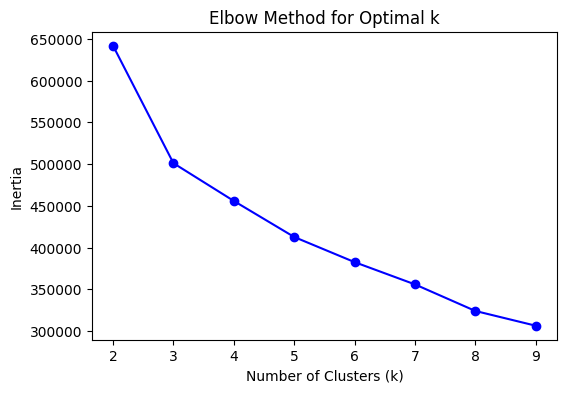

In [ ]:
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'o-', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
optimal_k = 3  # Adjust based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
sil_score = silhouette_score(X_scaled, df['cluster'])
db_score = davies_bouldin_score(X_scaled, df['cluster'])
ch_score = calinski_harabasz_score(X_scaled, df['cluster'])

print(f"📊 Clustering Evaluation Metrics:")
print(f" - Silhouette Score: {sil_score:.3f} (higher is better, max=1)")
print(f" - Davies-Bouldin Index: {db_score:.3f} (lower is better)")
print(f" - Calinski-Harabasz Score: {ch_score:.3f} (higher is better)")

📊 Clustering Evaluation Metrics:
 - Silhouette Score: 0.247 (higher is better, max=1)
 - Davies-Bouldin Index: 1.470 (lower is better)
 - Calinski-Harabasz Score: 33019.399 (higher is better)


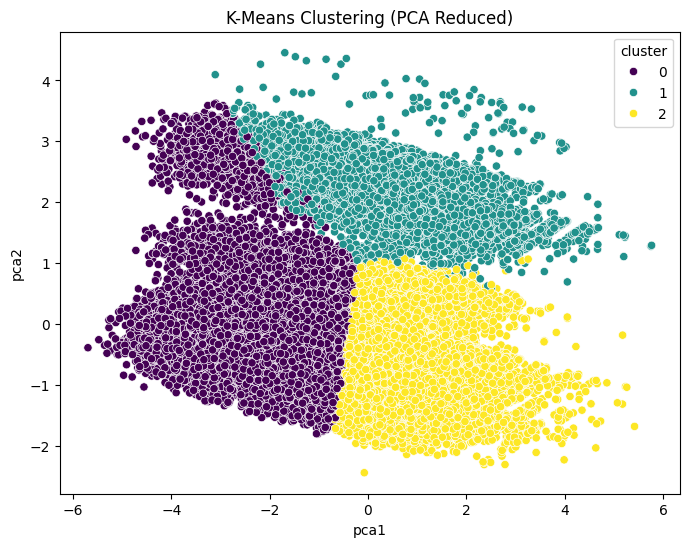

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['pca1'], df['pca2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis')
plt.title('K-Means Clustering (PCA Reduced)')
plt.show()

In [ ]:
cluster_summary = df.groupby('cluster')[['ctc', 'years_of_experience', 'orgyear', 'ctc_updated_year']].mean().round(2)
print("\n📈 Cluster Summary (Mean Values):")
print(cluster_summary)


📈 Cluster Summary (Mean Values):
                ctc  years_of_experience  orgyear  ctc_updated_year
cluster                                                            
0        1509336.02                13.29  2011.71           2018.81
1         881173.38                 9.01  2015.99           2019.72
2         986213.85                 7.77  2017.23           2019.86


Summary

1.The largest cluster contains approximately 45.64% of users, based on the proportional size computed in the cluster frequency summary.

2.The major clusters differ by average CTC, years of experience, and organizational tenure:


* Cluster 0 has the highest average CTC (1509336), longest experience (13.29 years), and earliest average joining year (2011.7)

* Cluster 1 and Cluster 2 present lower average CTCs and less experience (9.01 and 7.77years, respectively), indicating earlier career stages or smaller organizations

Key features separating clusters include years of experience, CTC and company joining year.

3.It is not always true that higher experience leads to higher CTC. There are cases (e.g some "fullstack engineers" with 7 years experience earning less than others with 8 years), clearly demonstrating exceptions due to company or role differences

4."Backend engineer" and "fullstack engineer" positions, commonly labeled entry level, have some learners with unusually high CTCs (e.g above 2000000), possibly due to working for FAANG or top-tier product companies

5.The average CTC for different job positions, based on the dataset, reveals that Data Scientists earn the highest average CTC at 2004372. Backend Engineers follow with an average CTC of 1843238 while Fullstack Engineers have a slightly lower average of 1784170. In comparison Android Engineers earn an average CTC of 1393021 which is noticeably lower than the other mentioned positions

6.Within a given company, the mean CTC for Data Scientists (e.g  2004372) is competitive or higher compared to roles like fullstack (e.g 1784170) or backend engineers (1843238), but outliers exist where some development roles outpace Data Scientist pay depending on org and tier

7.Tier 1 Companies Dominance:Tier 1 is dominated (24.18%) by FAANG, Top Indian unicorns and wellknown global tech firms. This dominance is explained by their higher pay scales and brand attracting top talent

Tier 3 Patterns: Tier 3 (48%) mainly consists of less-known, startup or non-tech companies. Learner pay and growth curves here are flatter,and more entry level or support roles are seen notable patterns include lower CTC ranges even for similar role titles.

8.Elbow method suggests 3 as the optimal number of clusters, evidenced by the 'elbow' in inertia plots.
Alignment with Manual Clustering:Clusters formed using unsupervised learning align generally with manual clusters on job position and company, but there are differences, unsupervised clusters sometimes group by underlying features (CTC, experience) rather than strictly designation or employer, uncovering nuanced segments missed by manual grouping







